The goal of this seminar exercise is to learn how to create and train a convolutional neural network in TensorFlow. We consider the task of image classification for handwritten digit recognition. We will demonstrate how the classification accuracy can be improved by using methods such as dropout.

For running this notebook, you can go to *Edit => Notebook* settings and select *GPU* as your Hardware Accelerator. This is not mandatory but will allow your notebook to run faster over Google Colab's available GPUs. 


In [ ]:
# import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# set the random seed
np.random.seed(1)

## MINIST Data

In [ ]:
# load MNIST data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# scale data
# we need to do this to ensure all pixel values will be between 0 ... 255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# shapes of training set
print("Training set images shape: {shape}".format(shape=x_train.shape))
print("Training set labels shape: {shape}".format(shape=y_train.shape))
# shapes of test set
print("Test set images shape: {shape}".format(shape=x_test.shape))
print("Test set labels shape: {shape}".format(shape=y_test.shape))
# number of classes
print('Number of classes: ', len(np.unique(y_train)))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)
Number of classes:  10


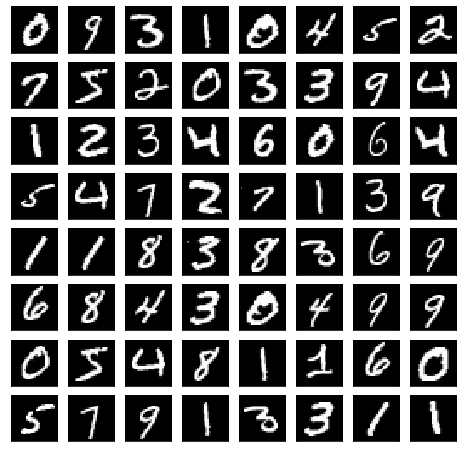

In [ ]:
# Visualize 8*8 images
def display(x, row, col):
    num_of_images = row * col
    fig, axe = plt.subplots(row, col, figsize=(8, 8))

    for i in range(row):
        for j in range(col):
            axe[i][j].imshow(x[np.random.randint(0, num_of_images), :].reshape(28, 28), origin="upper", cmap="gray", interpolation="nearest")
            axe[i][j].set_xticks([])
            axe[i][j].set_yticks([])
    plt.show()
    
# function activation
row = 8
col = 8
display(x_train, row, col)

## MNIST classification using CNN

### Build the model

In [ ]:
# CNN model
classification_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 5, activation='relu', padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, 5, activation='relu', padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Check the model configuration, including amount of trainable parameters
classification_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

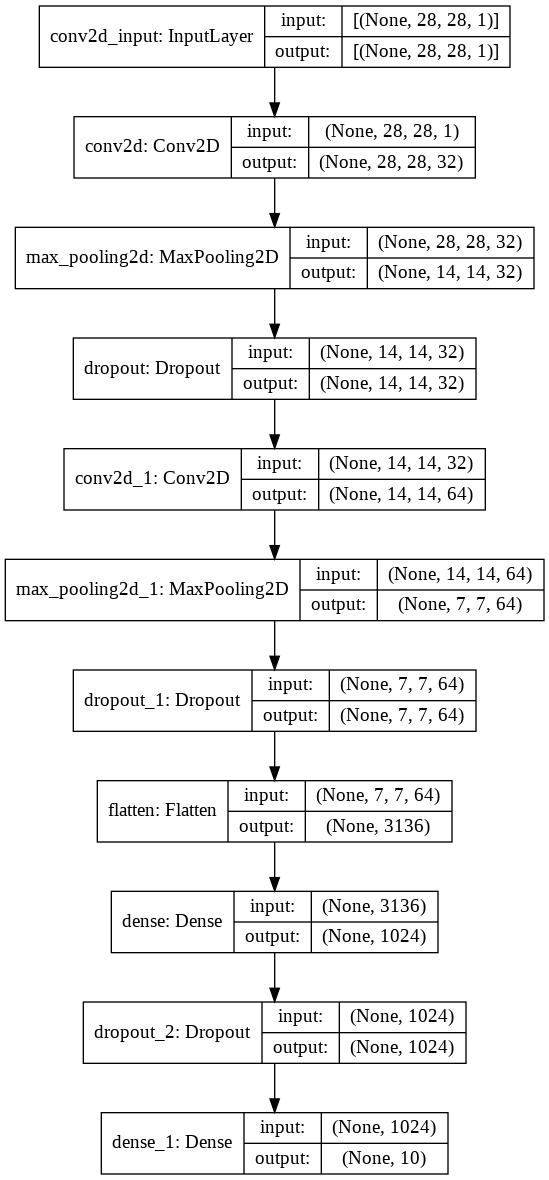

In [ ]:
# You can generate an image with the configuration of your model
from tensorflow.keras.utils import plot_model

plot_model(classification_cnn, 'cnn_model.png', show_shapes=True)

### Train the model

In [ ]:
# model compilation
# you need to specify the loss function, the optimizer (and corresponding parameters) and which metrics you want to observe during training
classification_cnn.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# model training
# you need to specify the input training data, batch (sample) size, number of iterations (epochs) 
# and what proportion of the training data will be used for validation
# you can use the `history` object to record loss and accuracy metrics during training
history = classification_cnn.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=15, validation_split=0.3, verbose=1)

Epoch 1/15
329/329 [==============================] - 5s 9ms/step - loss: 0.4905 - accuracy: 0.8427 - val_loss: 0.0842 - val_accuracy: 0.9732
Epoch 2/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9775 - val_loss: 0.0467 - val_accuracy: 0.9857
Epoch 3/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 4/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 5/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 6/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoch 7/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 

In [ ]:
# model evaluation
# you need to specify the input data for testing
loss, accuracy = classification_cnn.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)

print('Loss: ', loss)
print('Accuracy: ', accuracy)

Loss:  0.02276599034667015
Accuracy:  0.9934999942779541


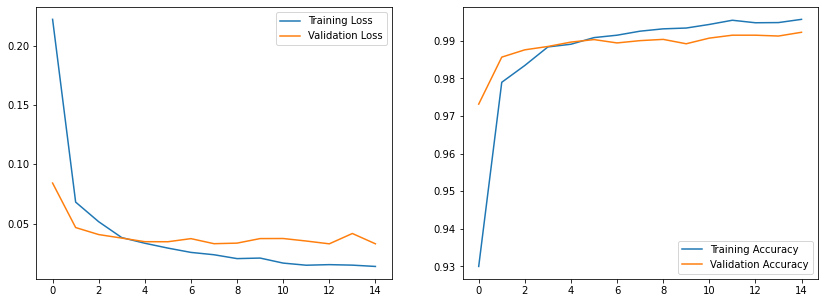

In [ ]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()